# Boston Housing Prices Linear Regression Model

### Sushil Sharma

Vanilla linear regression using sklearn on Boston Housing dataset

In [7]:
# importing required libraries 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.cross_validation import

In [2]:
# Loading Boston dataset
boston = load_boston()

# Let's look at the basic information
print(boston.keys())
print(boston.data.shape)
print(boston.feature_names)
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      in

In [3]:
# Loading dataset into a pandas dataframe for easy analysis
bos = pd.DataFrame(boston.data)
print(bos.head())

bos.columns = boston.feature_names

bos['PRICE'] = boston.target

print(bos.head())

#print(bos.describe())

X = bos.drop('PRICE', axis = 1)

Y = bos['PRICE']


# Splitting into train and test
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.33, random_state = 5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  

In [4]:
# Fitting Linear regression Model
lm = LinearRegression()
lm.fit(X_train, Y_train)
Y_train_pred = lm.predict(X_train)

Y_test_pred = lm.predict(X_test)
df=pd.DataFrame(Y_test_pred,Y_test)
print(df)
mse = mean_squared_error(Y_test, Y_test_pred)
print(mse)

               0
PRICE           
37.6   37.467236
27.9   31.391547
22.6   27.120196
13.8    6.468433
35.2   33.629667
10.4    5.670680
23.9   27.039467
29.0   29.927047
22.8   26.356613
23.2   22.452460
33.2   32.205044
19.0   21.786417
20.3   23.411384
36.1   33.608944
24.4   28.286195
17.2   15.138591
17.9    0.300873
19.6   18.718504
19.7   14.470671
15.0   11.108236
8.1     2.694942
23.0   19.216937
44.8   38.411593
23.1   24.369364
32.2   31.614934
10.8   11.422104
23.1   24.928622
21.2   23.311780
22.2   22.776408
24.1   20.650812
...          ...
10.5    5.626367
22.2   24.000463
30.5   30.371189
19.4   23.011267
15.6   18.291045
20.2   16.194709
19.3   21.608467
34.6   34.716659
50.0   23.405061
24.0   30.137479
18.7   18.095173
19.8   22.168443
22.5   29.092256
13.3   13.361467
50.0   31.860890
11.8   13.164368
11.0   13.917615
23.7   26.523144
35.4   31.394812
15.2   10.629138
24.4   24.686992
33.4   28.956509
31.6   32.317583
13.4   15.871136
34.9   29.943357
14.4    9.7183

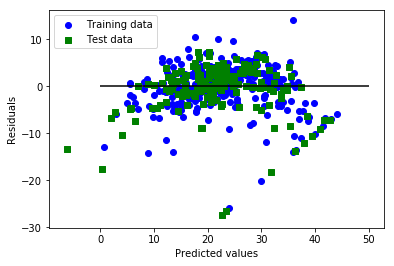

In [11]:
#Let's plot the results using matplotlib
plt.scatter(Y_train_pred, Y_train_pred - Y_train,c='blue',marker='o',label='Training data')
plt.scatter(Y_test_pred, Y_test_pred - Y_test,c='green',marker='s',label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc= 'upper left')
plt.hlines(y=0,xmin=0,xmax=50)
plt.plot()
plt.show()